Interval: 12 hours
------------------------------------------------------------
2025-12-29 10:38: 0 listings
2025-12-29 22:38: 16 listings
2025-12-30 10:38: 22 listings
2025-12-30 22:38: 41 listings
2025-12-31 10:38: 44 listings
2025-12-31 22:38: 55 listings
2026-01-01 10:38: 55 listings
2026-01-01 22:38: 89 listings
2026-01-02 10:38: 95 listings
2026-01-02 22:38: 113 listings
2026-01-03 10:38: 115 listings
2026-01-03 22:38: 136 listings
2026-01-04 10:38: 147 listings
2026-01-04 22:38: 167 listings
2026-01-05 10:38: 170 listings
2026-01-05 22:38: 197 listings
2026-01-06 10:38: 211 listings
2026-01-06 22:38: 227 listings
2026-01-07 10:38: 232 listings
2026-01-07 22:38: 249 listings
2026-01-08 10:38: 253 listings
2026-01-08 22:38: 281 listings
2026-01-09 10:38: 285 listings
2026-01-09 22:38: 306 listings
2026-01-10 10:38: 311 listings
2026-01-10 22:38: 338 listings
2026-01-11 10:38: 342 listings
2026-01-11 22:38: 366 listings
2026-01-12 10:38: 402 listings
2026-01-12 22:38: 431 listings


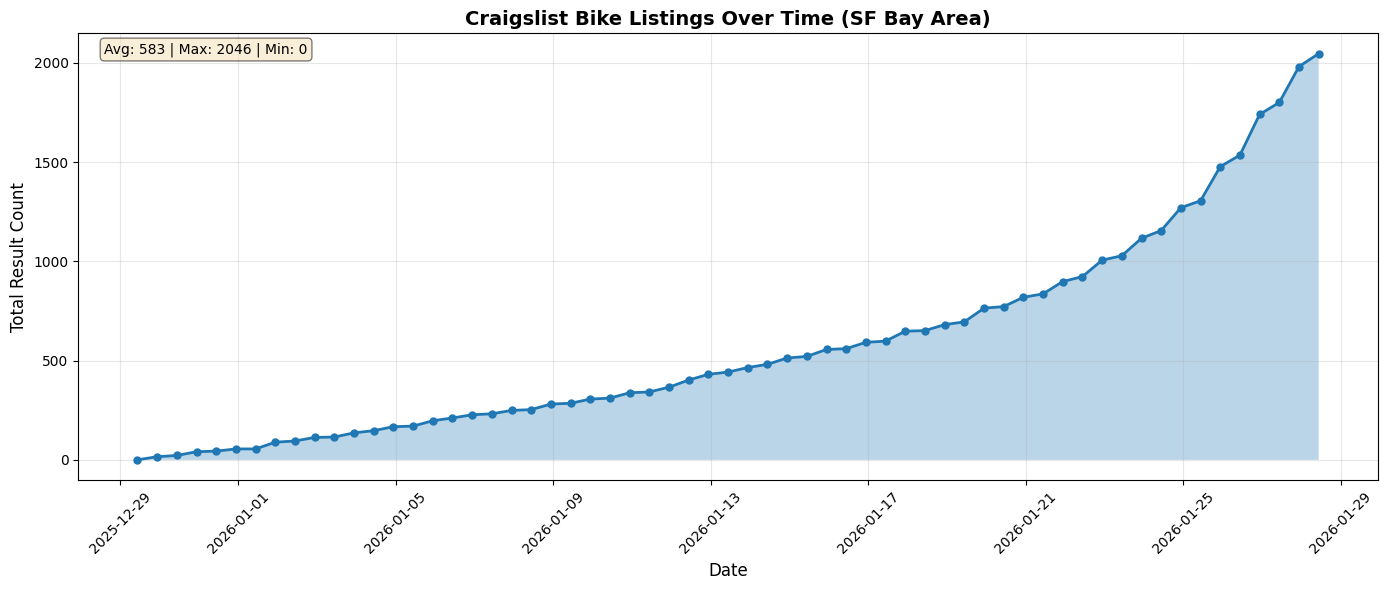


Statistics:
  Average: 583.1
  Maximum: 2046
  Minimum: 0
  Range: 2046


In [2]:
# Simple Jupyter Notebook Snippet
# Copy and paste this entire cell into a Jupyter notebook

import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Configuration
DAYS_BACK = 30
INTERVAL_HOURS = 12

# Collect data
timestamps = []
dates = []
counts = []

now = datetime.now()
start_time = now - timedelta(days=DAYS_BACK)
current_time = start_time

print(f"Collecting data from {start_time.strftime('%Y-%m-%d')} to {now.strftime('%Y-%m-%d')}")
print(f"Interval: {INTERVAL_HOURS} hours")
print("-" * 60)

while current_time <= now:
    timestamp = int(current_time.timestamp())

    # Make request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:147.0) Gecko/20100101 Firefox/147.0',
        'Accept': 'application/json',
    }

    params = {
        'batch': f'1-{timestamp}-0-1-0',
        'lat': '37.789',
        'lon': '-122.394',
        'searchPath': 'san-francisco-ca/bia',
        'search_distance': '15',
        'lang': 'en',
        'cc': 'us',
    }

    try:
        response = requests.get(
            'https://sapi.craigslist.org/web/v8/postings/search/full',
            params=params,
            headers=headers,
            timeout=10
        )

        if response.status_code == 200:
            count = response.json().get('data', {}).get('totalResultCount', 0)
            timestamps.append(timestamp)
            dates.append(current_time)
            counts.append(count)
            print(f"{current_time.strftime('%Y-%m-%d %H:%M')}: {count} listings")
        else:
            print(f"{current_time.strftime('%Y-%m-%d %H:%M')}: Error {response.status_code}")

    except Exception as e:
        print(f"{current_time.strftime('%Y-%m-%d %H:%M')}: Failed - {e}")

    current_time += timedelta(hours=INTERVAL_HOURS)
    time.sleep(0.5)  # Be polite to the API

print(f"\n✓ Collected {len(counts)} data points")

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(dates, counts, marker='o', linewidth=2, markersize=5)
plt.fill_between(dates, counts, alpha=0.3)
plt.title('Craigslist Bike Listings Over Time (SF Bay Area)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Result Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add statistics box
avg = sum(counts) / len(counts) if counts else 0
plt.text(0.02, 0.98, f'Avg: {avg:.0f} | Max: {max(counts)} | Min: {min(counts)}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print statistics
print("\nStatistics:")
print(f"  Average: {avg:.1f}")
print(f"  Maximum: {max(counts)}")
print(f"  Minimum: {min(counts)}")
print(f"  Range: {max(counts) - min(counts)}")